In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

(-3.1702069947848805, 3.4928978180953525)

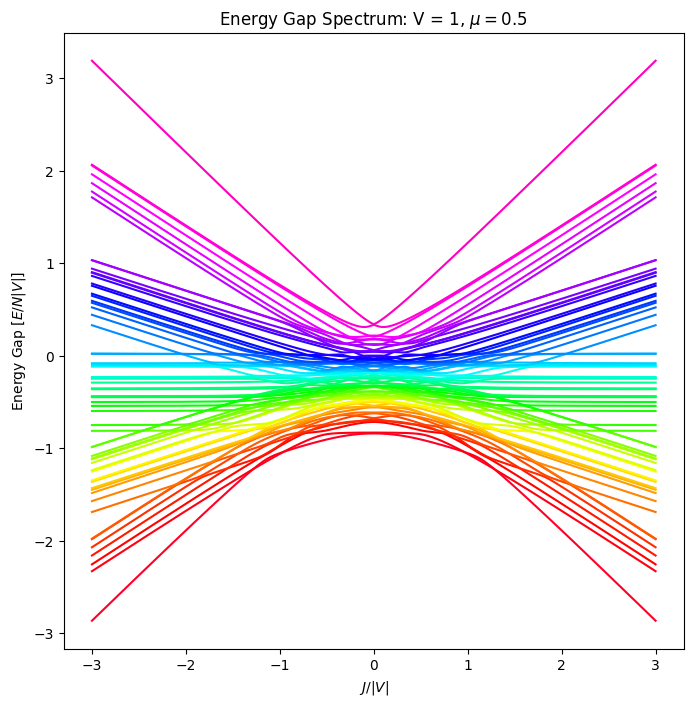

In [19]:
N = 6
M = 2
V = 1

J_V_ratios = np.linspace(-3,3,500)
mu_V_ratio = 0.5
energies = []

for J_V_ratio in J_V_ratios:
    hamiltonian = construct_rescaled_hamiltonian(N,M,V,mu_V_ratio = mu_V_ratio, J_V_ratio = J_V_ratio)
    eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
    energies += [eigenvalues/N]
    
energies = np.array(energies)

colors = get_cmap("gist_rainbow", M**N)
fig, ax = plt.subplots(figsize = (8,8))
for i in range(0,M**N):
   # ax.plot(J_V_ratios, energies[:,i]-energies[:,0], color = colors(i), label = f"$\Delta_{i}$")
    ax.plot(J_V_ratios, energies[:,i], color = colors(i), label = f"$\Delta_{i}$")


ax.set_title(f"Energy Gap Spectrum: V = {V}, $\mu = {mu_V_ratio}$")
#ax.legend(ncols = M**N - 1)
ax.set_ylabel("Energy Gap [$E/N|V|]$")
ax.set_xlabel("$J/|V|$")
ax.set_ylim()

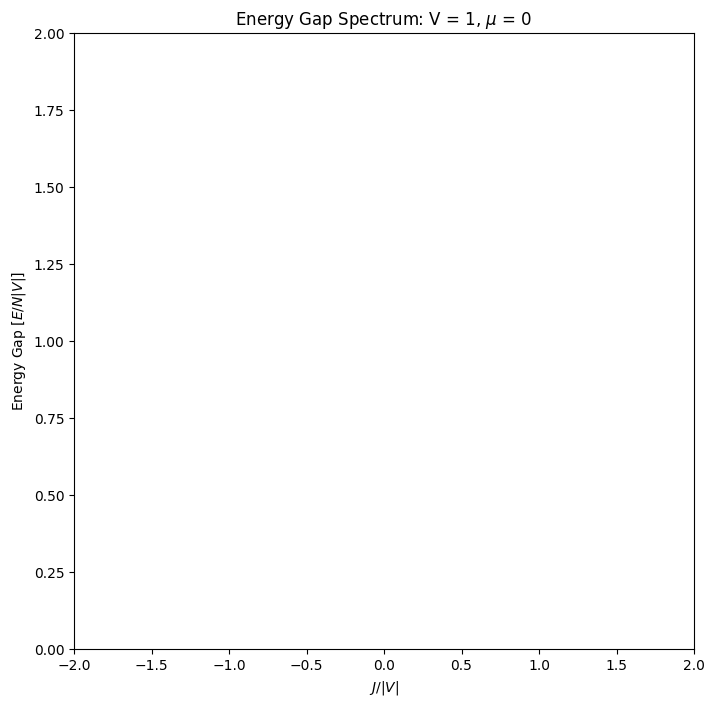

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.cm import get_cmap

# Parameters
N = 6
M = 2
V = 1
J_V_ratios = np.linspace(-2, 2, 100)
mu_values = np.linspace(0, 2, 100)  # Values of mu to animate over

colors = get_cmap("gist_rainbow", M**N-1)

fig, ax = plt.subplots(figsize=(8, 8))
lines = [ax.plot([], [], color=colors(i-1), label=f"$\Delta_{i}$")[0] for i in range(1, M**N)]

ax.set_xlim(J_V_ratios[0], J_V_ratios[-1])
ax.set_ylim(0, 2)  # Adjust based on expected energy gaps
ax.set_title(f"Energy Gap Spectrum: V = {V}, $\mu$ = 0")
ax.set_ylabel("Energy Gap [$E/N|V|]$")
ax.set_xlabel("$J/|V|$")
#ax.legend(ncols=M**N - 1), loc = "upper center")

# Update function for animation
def update(frame):
    mu_V_ratio = mu_values[frame]
    ax.set_title(f"Energy Gap Spectrum: V = {V}, $\mu$ = {mu_V_ratio:.2f}, $N={N}$, $M={M}$")
    
    energies = []
    for J_V_ratio in J_V_ratios:
        hamiltonian = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio=mu_V_ratio, J_V_ratio=J_V_ratio)
        eigenvalues, _ = exact_diagonalize(hamiltonian)
        energies.append(eigenvalues / N)
    
    energies = np.array(energies)
    for i, line in enumerate(lines):
        line.set_data(J_V_ratios, energies[:, i + 1] - energies[:, 0])  # Energy gaps
    
    return lines

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(mu_values), interval=100, blit=False)

# Show animation
plt.show()
ani.save(f'gap_spectrum_animation_N={N}_M={M}.gif', writer='pillow', fps=20)
